In [148]:
import cv2
from pathlib import Path
from PIL import Image
from skimage import img_as_ubyte

In [63]:
!ls ../data/day_color/

12.JPG				      HPIM1054.JPG
15.JPG				      HPIM1057.JPG
16.JPG				      HPIM1059.JPG
24.JPG				      HPIM1064.JPG
31.JPG				      HPIM1066.JPG
38.JPG				      HPIM1071.JPG
39.JPG				      HPIM1073.JPG
41.JPG				      ____HPIM1076______.JPG
42.JPG				      HPIM1083.JPG
53.JPG				      HPIM1089.JPG
55.JPG				      HPIM1093.JPG
5.JPG				      HPIM1097 me thorivo.JPG
60.JPG				      HPIM1101.JPG
61.JPG				      HPIM1111 me thorivo.JPG
63.JPG				      HPIM1116.JPG
64.JPG				      HPIM1117.JPG
6.JPG				      HPIM1121 kommena grammata.JPG
72.JPG				      HPIM1122.JPG
74.JPG				      HPIM1130.JPG
75.JPG				      HPIM1132 leipei 1.JPG
79.JPG				      HPIM1135.JPG
7.JPG				      !!!HPIM1143.JPG
88.JPG				      HPIM1153.JPG
89.JPG				      HPIM1166.JPG
HPIM0596.JPG			      HPIM1168.JPG
HPIM0597.JPG			      HPIM1172.JPG
HPIM0767.JPG			      HPIM1177.JPG
HPIM0774 ¢? §?  ?¤? ¢¦?¦ ?¦¨¬?¦¬.JPG  HPIM1185.JPG
HPIM0799.JPG			      HPIM1186 me thoribo.JPG
HPIM0801.JPG			      HPIM1192.JPG
HPIM0810.JPG		

In [119]:
path = Path().resolve()
# image_path = path.parent / "day_color(large sample)" / "5.JPG"
test_image_path = "../data/day_color/HPIM1291.JPG"
print(test_image_path)

../data/day_color/HPIM1291.JPG


In [120]:
car_image = cv2.imread(str(test_image_path),0)

In [121]:
def show_img(img):
    cv2.imshow('image',img)
    k = cv2.waitKey(0)
    if k == 27:         # wait for ESC key to exit
        cv2.destroyAllWindows()

In [155]:
gray_car_image = car_image * 255
threshold_value, binary_car_image = cv2.threshold(gray_car_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(threshold_value)

138.0


In [123]:
show_img(binary_car_image)

# 1st method (average)
## Scikit image approach
#### kudos to https://blog.devcenter.co/developing-a-license-plate-recognition-system-with-machine-learning-in-python-787833569ccd

In [110]:
from skimage.io import imread
from skimage.filters import threshold_otsu, threshold_adaptive, threshold_local
import matplotlib.pyplot as plt
from skimage import measure
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from skimage.transform import resize
%matplotlib inline

(1312, 1792)


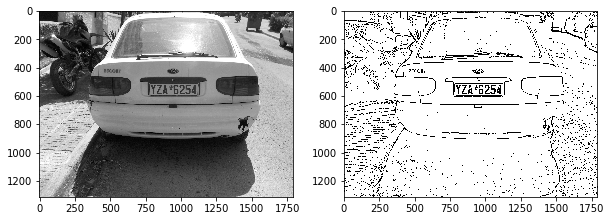

In [159]:
def binary_img_from_path(img_path: str):
    car_image = imread(img_path, as_grey=True)
    print(car_image.shape)
    gray_car_image = car_image * 255
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(gray_car_image, cmap="gray")
    threshold_value = threshold_local(gray_car_image, 31, offset=15)
    binary_car_image = gray_car_image > threshold_value
    ax2.imshow(binary_car_image, cmap="gray")
    plt.show()
    return binary_car_image
binary_car_image = binary_img_from_path(test_image_path)

### CCA

0.45115681233933164
0.875
0.5375
0.2727272727272727
0.3023255813953488
0.2923076923076923
0.27972027972027974
1.5416666666666667
1.8823529411764706
1.2608695652173914
0.8846153846153846
1.0068027210884354
1.8709677419354838
0.5
0.07086614173228346
0.1583710407239819
0.12295081967213115
0.717948717948718
0.5833333333333334
0.8
0.4523809523809524
1.7333333333333334
0.6666666666666666
0.6363636363636364
1.4444444444444444
0.28662420382165604
1.8857142857142857
1.736842105263158
1.8857142857142857
1.7837837837837838
1.8055555555555556
0.9629629629629629
1.7837837837837838
1.8333333333333333
0.5
0.03208556149732621
0.4074074074074074
1.0206185567010309
0.37806748466257667
0.09482758620689655
0.8292682926829268
1.2352941176470589


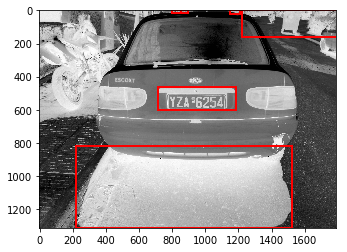

AssertionError: There are wrong number of detected plates 6

In [158]:
def get_roi_from_binarized(binary_img):
    label_image = measure.label(binary_img)

    plate_objects_cordinates = []
    plate_like_objects = []
    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray");
    # 28h, 107w ratio 0.26168224299
    for region in measure.regionprops(label_image):
        if region.area < 150:
            continue
        # the bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        region_height = max_row - min_row
        region_width = max_col - min_col
        # ensuring that the region identified satisfies the condition of a typical license plate
        dim_ratio = region_height/region_width
        print(dim_ratio)
        if dim_ratio > 0.15 and dim_ratio < 0.35:
            plate_like_objects.append(binary_img[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                                  max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col-min_col, max_row-min_row, edgecolor="red", linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
    plt.show()
    assert len(plate_like_objects) == 0, "There are wrong number of detected plates {}".format(len(plate_like_objects))
    return plate_like_objects
plate_like_objects = get_roi_from_binarized(binary_car_image)

/home/alcaster/.pyenv/versions/3.6.4/envs/ml/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


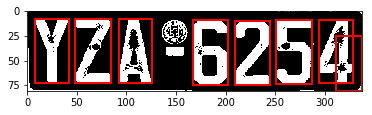

In [132]:
def licence_plate_chars_from_roi(roi):
    license_plate = np.invert(roi)
    labelled_plate = measure.label(license_plate)

    fig, ax1 = plt.subplots(1)
    ax1.imshow(license_plate, cmap="gray")

    character_dimensions = (0.63*license_plate.shape[0], 0.95*license_plate.shape[0], 0.02*license_plate.shape[1], 0.20*license_plate.shape[1])
    min_height, max_height, min_width, max_width = character_dimensions
    characters = []
    counter=0
    column_list = []
    for regions in measure.regionprops(labelled_plate):
        y0, x0, y1, x1 = regions.bbox
        region_height = y1 - y0
        region_width = x1 - x0

        if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
            roi = license_plate[y0:y1, x0:x1]

            rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rect_border)
            resized_char = resize(roi, (20, 20))
            characters.append(resized_char)

            column_list.append(x0)

    plt.show()
    assert len(characters), "There is too many characters"

licence_plate_chars_from_roi(plate_like_objects[0])

# 2nd method todo
##### Segmenting using https://gurus.pyimagesearch.com/lesson-sample-segmenting-characters-from-license-plates/

In [162]:
binary_car = img_as_ubyte(binary_car_image)
show_img(binary_car)

In [ ]:
element = getStructuringElement(cv::MORPH_RECT, cv::Size(17, 3) );
cv::morphologyEx(img_threshold, img_threshold, CV_MOP_CLOSE, element); //Does the trick
std::vector< std::vector< cv::Point> > contours;
cv::findContours(img_threshold, contours, 0, 1); 